Karthik Konath (kk28699), Kyle Polansky (kpp446)

# <center>EE 379K-DS Lab 2<center>

# Question 1 Correlations

When given a data matrix, an easy way to tell if any two columns are correlated is to look at a scatter plot of each column against each other column. For a warm up, do this:  

Look at the data in DF1 in Lab2.zip.  

Which columns are (pairwise) correlated?  
Figure out how to do this with Pandas, and also how to do this with Seaborn

Compute the covariance matrix of the data. Write the explicit expression for what this is, and then use any command you like (e.g., np.cov) to compute the 4 × 4 matrix. Explain why the numbers that you get fit with the plots you got.

The above problem in reverse. Generate a zero-mean multivariate Gaussian random variable in 3 dimensions, Z = ($X_1$, $X_2$, $X_3$) so that ($X_1$, $X_2$) and ($X_1$, $X_3$) are uncorrelated, but ($X_2$, $X_3$) are correlated. Specifically: choose a covariance matrix that has the above correlations structure, and write this down. Then find a way to generate samples from this Gaussian. Choose one of the non-zero covariance terms ($C_{ij}$ , if $C$ denotes your covariance matrix) and plot it vs the estimated covariance term, as the number of samples you use scales. The goal is to get a visual representation of how the empirical covariance converges to the true (or family) covariance.

# Question 2 Outliers

Consider the two-dimensional data in DF2 in Lab2.zip. Look at a scatter plot of the data. It contains two points that look like potential outliers. Which one is “more” outlying? Propose a transformation of the data that makes it clear that the point at (−1, 1) is more outlying than the point at (5.5, 5), even though the latter point is“farther away” from the nearest points. Plot the data again after performing this transformation. Provide discussion as appropriate to justify your choice of transformation. 

Hint: if y comes from a standard Gaussian in two dimensions (i.e., with covariance equal to the two by two identity matrix), and

$Q=(
\begin{matrix}
    2       & 1/2 \\
    1/2       & 2 \\
\end{matrix}
)$

what is the covariance matrix of the random variable z = Qy? If you are given z, how would you create a random Gaussian vector with covariance equal to the identity, using z?

# Question 3 Even More Standard Error

(This is to be completed only after you’ve completed the last written exercise below).  

In one of the written exercises below, you derive an expression for what is called the Standard Error: where β denotes the “truth,” βˆ denotes the value we compute using least squares linear regression, and Z and e are as in the exercise below, you
find:  

$\hat{β} − β = Z_e$

If we know the distribution of the noise (the distribution generating the noise vectors, $e_i$), then we know the distribution for the error, (βˆ − β). This allows us to answer the question given in class: if we solve a regression and obtain value βˆ, how can we tell if it is statistically significant? The answer is: we compare the size of βˆ to the spread introduced by the noise (i.e., the standard error), and we ask: what is the likelihood that the true β = 0, and what we observed was purely due to the noise.

If the noise is Gaussian (normal), i.e., ei ∼ N(0, $σ^2$), and if the values of the $x_i$ are normalized, then we expect error of the size $σ/\sqrt{n}$, as this is roughly the standard deviation of the expression for the error that you derive above. This means: if you have twice the data points, you should expect the error to be reduced by about 1.4 (the formula says that the standard deviation of the error would decrease by a factor of $1/\sqrt{2}$).

Compute this empirically, as follows: We will generate data for a regression problem, solve it, and see what the error is: Generate data as I did in the example from class: $x_i$ ∼ N(0, 1), ei ∼ N(0, 1). Generate y by $y_i = β_0 + x_iβ + e_i$, where $β_0 = −3$ and β = 0.

<i>Note that since β = 0, this means that y and x are unrelated! The question we are exploring here is as follows: when we solve a regression problem, we are not going to find βˆ = 0 – we will find that βˆ takes some other values, hopefully close to zero. How do we know if the value of βˆ we get is statistically meaningful?</i>

By creating fresh data and each time computing βˆ and recording βˆ − β, compute the <i>empirical standard deviation</i> of the error for n = 150 (the number we used in class). In class, in the exercise where I tried to find a linear regression of y vs. noise, we found βˆ = −0.15. Given your empirical computation of the standard deviation of the error, how significant is the value −0.15?

Now repeat the above experiment for different values of n. Plot these values, and on the same plot, plot $1/\sqrt{n}$. How is the fit?

# Question 4 Names and Frequencies

The goal of this exercise is for you to get more experience with Pandas, and to get a chance to explore a cool data set. Download the file Names.zip from Canvas. This contains the frequency of all names that appeared more than 5 times on a social security application from 1880 through 2015.

Write a program that on input k and XXXX, returns the top k names from year XXXX.

In [67]:
import numpy as np
import pandas as pd

#Helper function
def GetYearNameData(year):
    filePath = "Names/yob%s.txt" % year
    df = pd.read_table(filePath, sep=",", header=None, names=["name", "gender", "count"])
    return df

#Enter Year/Top K Names
year = 1990
topK = 6

#Get Data
df = GetYearData(year)
df = df.sort_values('count', ascending=False)

print(df.head(topK).to_string(index=False))

              name gender  count
15233      Michael      M  65275
15234  Christopher      M  52331
0          Jessica      F  46470
1           Ashley      F  45553
15235      Matthew      M  44794
15236       Joshua      M  43216


Write a program that on input Name returns the frequency for men and women of the name Name.

In [83]:
name = "John"
startYear = 1880
endYear = 2015

#Get data for each year
for year in range(startYear, endYear + 1):
    df = GetYearData(year)
    specifiedPeopleCount = df[df.name == name]['count'].sum()
    print("fequency('%s') in year(%s): %s" % (name, year, specifiedPeopleCount))

fequency('John') in year(1880): 9701
fequency('John') in year(1881): 8795
fequency('John') in year(1882): 9597
fequency('John') in year(1883): 8934
fequency('John') in year(1884): 9428
fequency('John') in year(1885): 8801
fequency('John') in year(1886): 9074
fequency('John') in year(1887): 8166
fequency('John') in year(1888): 9299
fequency('John') in year(1889): 8600
fequency('John') in year(1890): 8558
fequency('John') in year(1891): 7724
fequency('John') in year(1892): 9093
fequency('John') in year(1893): 8110
fequency('John') in year(1894): 8298
fequency('John') in year(1895): 8381
fequency('John') in year(1896): 8189
fequency('John') in year(1897): 7596
fequency('John') in year(1898): 8214
fequency('John') in year(1899): 7030
fequency('John') in year(1900): 9875
fequency('John') in year(1901): 6938
fequency('John') in year(1902): 7945
fequency('John') in year(1903): 7649
fequency('John') in year(1904): 8148
fequency('John') in year(1905): 8103
fequency('John') in year(1906): 8307
f

It could be that names are more diverse now than they were in 1880, so that a name may be relatively the most popular, though its frequency may have been decreasing over the years. Modify the above to return the relative frequency.

In [84]:
name = "John"

#Get data for each year
for year in range(startYear, endYear + 1):
    df = GetYearData(year)
    totalPeopleCount = df['count'].sum()
    specifiedPeopleCount = df[df.name == name]['count'].sum()
    relativeFrequency = specifiedPeopleCount / totalPeopleCount
    print("Relative fequency('%s') in year(%s): %s" % (name, year, relativeFrequency))

Relative fequency('John') in year(1880): 0.048148221677370685
Relative fequency('John') in year(1881): 0.04564183999667871
Relative fequency('John') in year(1882): 0.043320664096707505
Relative fequency('John') in year(1883): 0.04118094447901542
Relative fequency('John') in year(1884): 0.03872457005787327
Relative fequency('John') in year(1885): 0.036540808954802495
Relative fequency('John') in year(1886): 0.03553985406491487
Relative fequency('John') in year(1887): 0.03300780934210739
Relative fequency('John') in year(1888): 0.0310511096121867
Relative fequency('John') in year(1889): 0.029763140772734193
Relative fequency('John') in year(1890): 0.028394066376687534
Relative fequency('John') in year(1891): 0.026943402808057907
Relative fequency('John') in year(1892): 0.02719385603674894
Relative fequency('John') in year(1893): 0.024936812392765555
Relative fequency('John') in year(1894): 0.024500135816612142
Relative fequency('John') in year(1895): 0.02387586034003373
Relative fequency

Find all the names that used to be more popular for one gender, but then became more popular for another gender.

In [125]:
#Get data for each year, adding a year column
df = pd.DataFrame()
for year in range(startYear, endYear + 1):
    df_wip = GetYearData(year)
    df_wip['year'] = year
    df = df.append(df_wip, ignore_index=True)

In [126]:
#Filter by only the most popular gender per year
idx = df.groupby(['name', 'year'])['count'].transform(max) == df['count']
df = df[idx]

In [127]:
#Search for names where multiple genders exist between years
df_final = df.groupby('name').filter(lambda x: len(x.gender.unique()) > 1)
names = df_final.name.unique()

In [128]:
#Print unique names
names.sort()
np.set_printoptions(threshold=np.inf)
print("Names where most popular gender has changed between (%s, %s):" % (startYear, endYear))
print(names)

Names where most popular gender has changed between (1880, 2015):
['Aalijah' 'Aamari' 'Aaren' 'Aareon' 'Aari' 'Aarian' 'Aarin' 'Aarion'
 'Aaris' 'Aarya' 'Aaryn' 'Aavyn' 'Aba' 'Abba' 'Abbey' 'Abell' 'Abey'
 'Abie' 'Abijah' 'Abimbola' 'Abiola' 'Abir' 'Abishai' 'Abiyah' 'Abney'
 'Abrar' 'Abraxas' 'Abrian' 'Abriel' 'Aby' 'Abyan' 'Acea' 'Acelin' 'Acey'
 'Acie' 'Acy' 'Adair' 'Adali' 'Adalid' 'Adama' 'Adar' 'Adason' 'Addington'
 'Addis' 'Addison' 'Addy' 'Adean' 'Adebola' 'Adel' 'Adell' 'Adeola'
 'Adeyinka' 'Adgie' 'Adi' 'Adie' 'Adis' 'Adisa' 'Adison' 'Adlai' 'Adley'
 'Admire' 'Adna' 'Adonai' 'Adoniah' 'Adraine' 'Adrean' 'Adriann' 'Adrien'
 'Adriene' 'Adrienn' 'Adrin' 'Adrine' 'Adryan' 'Adryn' 'Adyn' 'Aeon'
 'Aerion' 'Aeron' 'Afsheen' 'Afton' 'Agam' 'Agape' 'Ah' 'Ahmari' 'Ahmi'
 'Ai' 'Aideen' 'Aidyn' 'Aidynn' 'Aijalon' 'Aiman' 'Aimar' 'Aime' 'Aimen'
 'Ainsley' 'Airen' 'Aireon' 'Aires' 'Airin' 'Airon' 'Aivan' 'Ajae' 'Ajai'
 'Ajalon' 'Ajene' 'Akai' 'Aki' 'Akida' 'Akie' 'Akili' 'Akira' 'Ako' 'Ako

(Optional) Find something cool about this data set.

In [129]:
#Get data for each year
kyleSum = 0
karthikSum = 0

for year in range(startYear, endYear + 1):
    df = GetYearData(year)
    kyleSum += df[df.name == 'Kyle']['count'].sum()
    karthikSum += df[df.name == 'Karthik']['count'].sum()

print("Our group members names have showed up in applications:")
print("Kyle's name has been used in %s applications between years(%s, %s)" % (kyleSum, startYear, endYear))
print("Karthik's name has been used in %s applications between years(%s, %s)" % (karthikSum, startYear, endYear))

Our group members names have showed up in applications:
Kyle's name has been used in 482411 applications between years(1880, 2015)
Karthik's name has been used in 1186 applications between years(1880, 2015)


# Question 5 Visualization Tools and Missing/Hidden Values

Visualization is important both for exploring the data, as well as for explaining what you have done. There are a huge number of such tools now available. This exercise walks through various functionalities of matplotlib and pandas.

The first part of this exercise was created by Dataquest. Run through the commands given in this tutorial: https://www.dataquest.io/blog/matplotlib-tutorial/ and understand the code.

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline

#Import tweets
tweets = pd.read_csv("tweets.csv")
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ..."


In [134]:
#Gets candidates mentioned in a tweet
def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    return ",".join(candidates)

tweets["candidate"] = tweets.apply(get_candidate,axis=1)

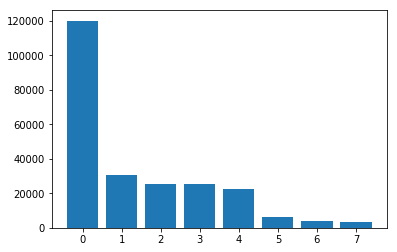

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


In [136]:
#Graph the counts of each mention
counts = tweets["candidate"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()

print(counts)

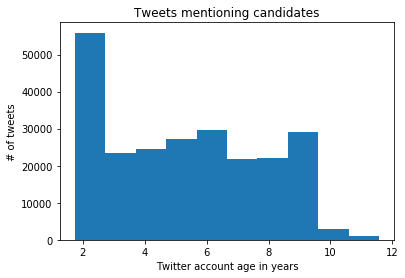

In [138]:
from datetime import datetime

tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])

#Annotated histogram with tweets and user account age
tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)
plt.hist(tweets["user_age"])
plt.title("Tweets mentioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

c:\users\kyle\appdata\local\programs\python\python35\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


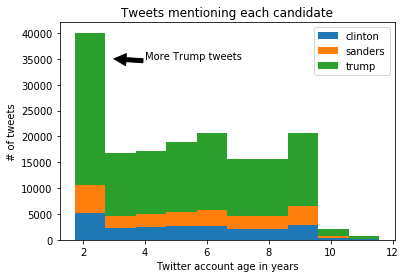

In [142]:
cl_tweets = tweets["user_age"][tweets["candidate"] == "clinton"]
sa_tweets = tweets["user_age"][tweets["candidate"] == "sanders"]
tr_tweets = tweets["user_age"][tweets["candidate"] == "trump"]
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)

#Stacked annotated histogram with tweets and user account age
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.annotate('More Trump tweets', xy=(3, 35000), xytext=(4, 35000),
            arrowprops=dict(facecolor='black'))
plt.show()

In [143]:
import matplotlib.colors as colors

#Get red/blue colors in each users profile background color
tweets["red"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[0])
tweets["blue"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[2])

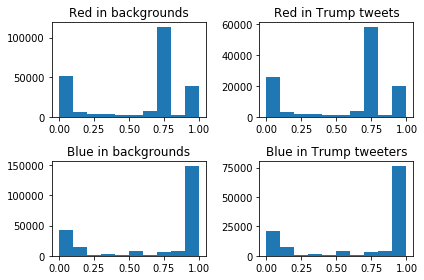

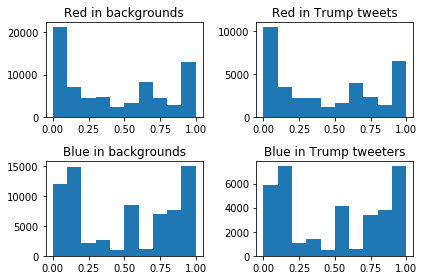

In [148]:
#Only users that do not have the default Twitter profile background color
tc = tweets[~tweets["user_bg_color"].isin(["C0DEED", "000000", "F5F8FA"])]

def create_plot(data):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax0, ax1, ax2, ax3 = axes.flat

    ax0.hist(data["red"])
    ax0.set_title('Red in backgrounds')

    ax1.hist(data["red"][data["candidate"] == "trump"].values)
    ax1.set_title('Red in Trump tweets')

    ax2.hist(data["blue"])
    ax2.set_title('Blue in backgrounds')

    ax3.hist(data["blue"][data["candidate"] == "trump"].values)
    ax3.set_title('Blue in Trump tweeters')

    plt.tight_layout()
    plt.show()

create_plot(tweets)
create_plot(tc)

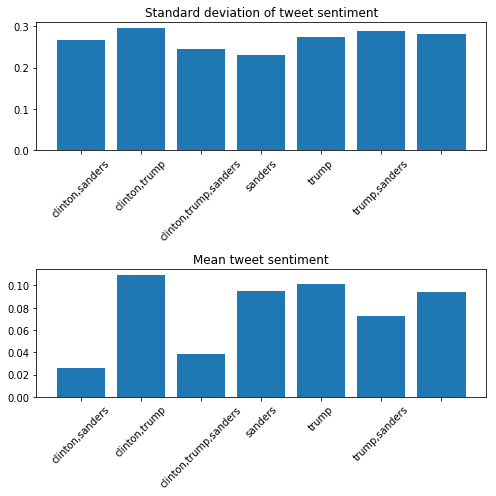

In [150]:
gr = tweets.groupby("candidate").agg([np.mean, np.std])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
ax0, ax1 = axes.flat

std = gr["polarity"]["std"].iloc[1:]
mean = gr["polarity"]["mean"].iloc[1:]
ax0.bar(range(len(std)), std)
ax0.set_xticklabels(std.index, rotation=45)
ax0.set_title('Standard deviation of tweet sentiment')

ax1.bar(range(len(mean)), mean)
ax1.set_xticklabels(mean.index, rotation=45)
ax1.set_title('Mean tweet sentiment')

plt.tight_layout()
plt.show()

In [151]:
def tweet_lengths(text):
    if len(text) < 100:
        return "short"
    elif 100 <= len(text) <= 135:
        return "medium"
    else:
        return "long"

tweets["tweet_length"] = tweets["text"].apply(tweet_lengths)

#Calculate tweet lengths
tl = {}
for candidate in ["clinton", "sanders", "trump"]:
    tl[candidate] = tweets["tweet_length"][tweets["candidate"] == candidate].value_counts()

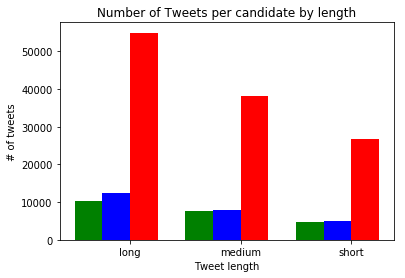

In [152]:
#Plot tweet length per candidate
fig, ax = plt.subplots()
width = .5
x = np.array(range(0, 6, 2))
ax.bar(x, tl["clinton"], width, color='g')
ax.bar(x + width, tl["sanders"], width, color='b')
ax.bar(x + (width * 2), tl["trump"], width, color='r')

ax.set_ylabel('# of tweets')
ax.set_title('Number of Tweets per candidate by length')
ax.set_xticks(x + (width * 1.5))
ax.set_xticklabels(('long', 'medium', 'short'))
ax.set_xlabel('Tweet length')
plt.show()

Suppose that you would now like to plot some of the results by state. As you will see, the state information is sometimes missing, and other times it comes in varying forms. Figure out how to aggregate the results by state. The challenge here: how many of the tweets can you (correctly) assign to a state? Note: depending on how well you want to do (i.e., how many tweets you want to correctly assign to their state), this is not an easy problem!

In [252]:
import re

states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

def user_state(location):
    location = str(location).upper()
    for abbr in states:
        if re.match("[^a-zA-Z\d](%s)" % abbr, location) \
        or states.get(abbr).upper() in location:
            return abbr    
    
    return np.nan

#Apply state abbreviations
tweets["user_state"] = tweets["user_location"].apply(user_state)

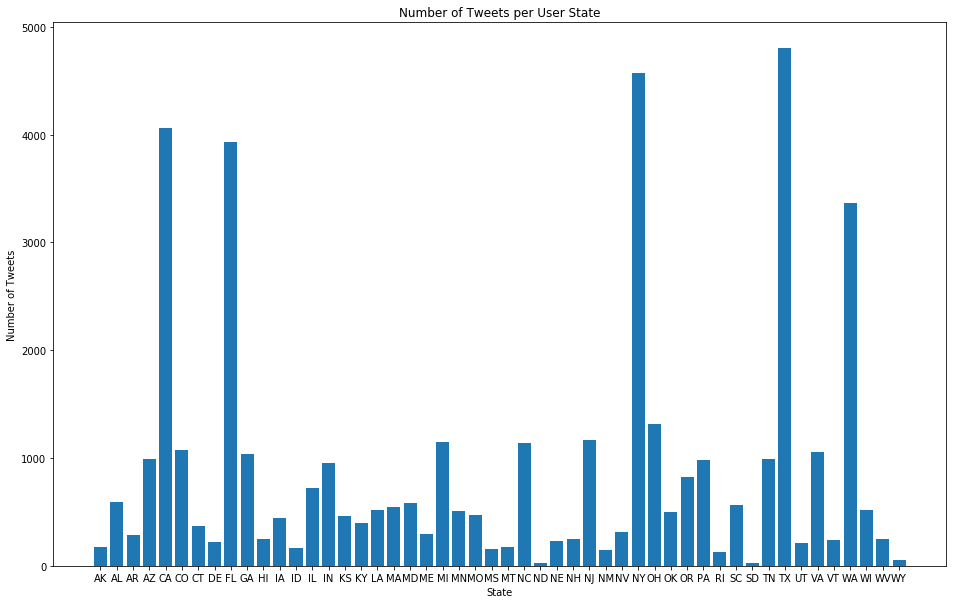

Total number of identified states: 44191


In [257]:
#Graph the tweets per state
counts = tweets["user_state"].value_counts()
plt.figure(figsize=(16,10))
plt.bar(counts.index, counts)
plt.title('Number of Tweets per User State')
plt.xlabel('State')
plt.ylabel('Number of Tweets')
plt.show()

print("Total number of identified states:", tweets["user_state"].count())

# Question 6 More Visualization Tools – Optional

This exercise was also created by Dataquest. Run through the exercise https://www.dataquest.io/blog/python-data-visualization-libraries/ for more visualization tools, including some that allow you to plot points on a map, and also to create interactive maps (zoom in, etc.).